In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.io import readsav
from scipy import interpolate

plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)



In [2]:
PSB_savfile = 'data/PSB_EAGLE_properties_Davis19.sav'

In [3]:
content = readsav(PSB_savfile, python_dict=True, )
# zdrop seems to be lookbacktime!!
content['lbt_drop'] = content.pop('zdrop')

In [4]:
# two little convenience functions
z_to_lbt = interpolate.interp1d(content['redshift_mt'], content['lbt_mt'], kind='linear')
lbt_to_z = interpolate.interp1d(content['lbt_mt'], content['redshift_mt'], kind='linear')


In [5]:
# So what's in there?
for k in content.keys(): print(f'{k:<30s}, Shape: {np.shape(content[k])}')

subgal_thatdropped            , Shape: (1244,)
gal_thatdropped               , Shape: (1244,)
dropsize                      , Shape: (1244,)
mass_at_burst                 , Shape: (1244,)
psb_mstar                     , Shape: (201, 1244)
psb_mhalo                     , Shape: (201, 1244)
psb_mgas_all                  , Shape: (201, 1244)
psb_groupnum                  , Shape: (201, 1244)
psb_subgroupnum               , Shape: (201, 1244)
psb_cent_of_pot               , Shape: (201, 3, 1244)
halosmass_at_drop             , Shape: (1244,)
stellarmass_at_drop           , Shape: (1244,)
nearest_halo_rvir             , Shape: (1244,)
sub_atdrop                    , Shape: (1244,)
n_10mpc                       , Shape: (1244,)
rho_10mpc                     , Shape: (1244,)
sigma_10mpc                   , Shape: (1244,)
n_5mpc                        , Shape: (1244,)
rho_5mpc                      , Shape: (1244,)
sigma_5mpc                    , Shape: (1244,)
psb_topleaf                   , S

[]

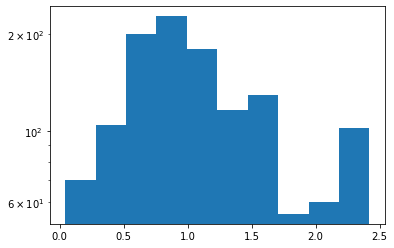

In [6]:
plt.hist(lbt_to_z(content['lbt_drop']))
plt.semilogy()

In [11]:
# How much lookback time is between consecutive lookback times?
content['lbt_mt'] - np.roll(content['lbt_mt'],-1)

array([  0.0164102 ,   0.01685604,   0.01737381,   0.01773412,
         0.01820401,   0.01859857,   0.01899612,   0.01938563,
         0.01977815,   0.02011532,   0.02048007,   0.02079902,
         0.02113622,   0.02146684,   0.02175791,   0.02206327,
         0.02233539,   0.02261899,   0.0228832 ,   0.02314613,
         0.02338321,   0.02362117,   0.0238466 ,   0.02407119,
         0.02426474,   0.02445677,   0.0246508 ,   0.02482903,
         0.0249981 ,   0.02515564,   0.02529726,   0.0254512 ,
         0.02557165,   0.02569097,   0.02580498,   0.02591887,
         0.02603487,   0.02616243,   0.02629   ,   0.02641181,
         0.0265635 ,   0.02671013,   0.02686054,   0.02701221,
         0.04084072,   0.02744123,   0.02763563,   0.02782758,
         0.02803151,   0.02824434,   0.02846015,   0.0286945 ,
         0.02893931,   0.02917657,   0.02945313,   0.02972171,
         0.03000096,   0.0302933 ,   0.01527344,   0.03075027,
         0.03109037,   0.03142327,   0.03176347,   0.03